# Linear regression model

$\hat{y} \ = \ w_0 \ + \ w_1 x_1$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
housing = pd.read_csv('housing_sample.csv')
housing[:3]

,Neighborhood,Exterior1st,YearBuilt,LotFrontage,GrLivArea,GarageArea,BedroomAbvGr,FullBath,OverallQual,HeatingQC,SalePrice
0,CollgCr,VinylSd,2003,65.0,1710,548,3,2,7,Ex,208500
1,Veenker,MetalSd,1976,80.0,1262,460,3,2,6,Ex,181500
2,CollgCr,VinylSd,2001,68.0,1786,608,3,2,7,Ex,223500


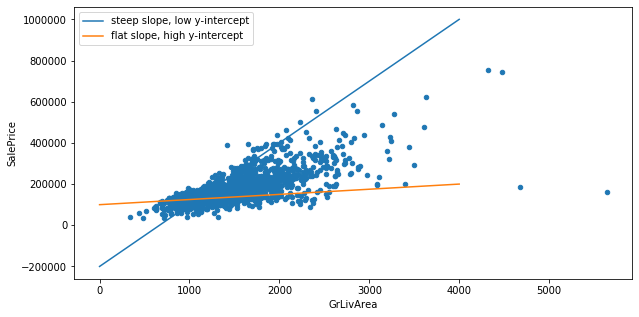

In [2]:
fig, ax = plt.subplots(figsize=(10,5))
housing.plot(x='GrLivArea', y='SalePrice', kind='scatter', ax=ax);
ax.plot([0, 4000], [-200_000, 1_000_000], label='steep slope, low y-intercept')
ax.plot([0, 4000], [100_000, 200_000], label='flat slope, high y-intercept')
ax.legend()
#fig

Hence we have boundaries for intercept as [100,000, -200,000] and for slope [25, 300]

In [3]:
# Iterate over combinations to calculate RMSE
# Note the multiplication over all the values of X!!
X = housing['GrLivArea']
y = housing['SalePrice']
errors = {'w0': [], 'w1': [], 'rmse': []}
w0_range = range(-100_000, 125_000, 25_000)
w1_range = range(50, 300, 25)

for w0 in w0_range:
    for w1 in w1_range:
        y_pred = w0 + w1 * X
        error = y - y_pred
        rmse = np.sqrt((error ** 2).mean())
        errors['w0'].append(w0)
        errors['w1'].append(w1)
        errors['rmse'].append(rmse)

df_errors = pd.DataFrame(errors)
df_errors.sort_values('rmse').head(4)

,w0,w1,rmse
52,25000,100,56329.492140
43,0,125,57449.175994
71,75000,75,59030.490279
33,-25000,125,59159.272312


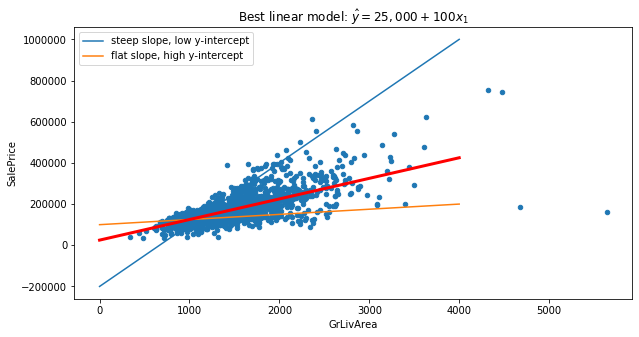

In [4]:
def simple_lr_model(X):
    return 25000 + 100 * X

X = np.array([0, 4000])
y_pred = simple_lr_model(X)
ax.plot(X, y_pred, color='red', label='best model', lw=3)
ax.set_title('Best linear model: $\hat{y} = 25,000 + 100 x_1$')
ax.legend
fig

In [5]:
def compute_r2(input_col, w0_range, w1_range):
    X = housing[input_col]
    y = housing['SalePrice']
    errors_r2 = {'w0':[], 'w1':[], 'r2':[]}
    variance = ((y - y.mean())**2).sum()
    for w0 in w0_range:
        for w1 in w1_range:
            y_pred = w0 + w1 * X
            sse = ((y - y_pred)**2).sum()
            r2 = (variance - sse) / variance
            errors_r2['w0'].append(w0)
            errors_r2['w1'].append(w1)
            errors_r2['r2'].append(r2)
    return pd.DataFrame(errors_r2)

df_errors_r2 = compute_r2('GrLivArea', w0_range, w1_range)
df_errors_r2.sort_values('r2', ascending=False).head(3)

,w0,w1,r2
52,25000,100,0.496889
43,0,125,0.476690
71,75000,75,0.447484


In [6]:
df_pivot = df_errors_r2.pivot(index='w0', columns='w1', values='r2').round(2)
df_pivot.style.background_gradient(cmap='coolwarm', axis=None)

w1,50,75,100,125,150,175,200,225,250,275
w0,,,,,,,,,,
-100000,-6.31,-3.98,-2.15,-0.84,-0.03,0.26,0.05,-0.68,-1.91,-3.66
-75000,-4.79,-2.75,-1.23,-0.21,0.29,0.29,-0.23,-1.25,-2.79,-4.83
-50000,-3.46,-1.72,-0.5,0.22,0.42,0.11,-0.7,-2.03,-3.86,-6.21
-25000,-2.33,-0.89,0.03,0.45,0.35,-0.26,-1.37,-3,-5.13,-7.78
0,-1.39,-0.26,0.36,0.48,0.08,-0.83,-2.24,-4.17,-6.6,-9.55
25000,-0.66,0.17,0.5,0.31,-0.39,-1.59,-3.31,-5.54,-8.27,-11.52
50000,-0.12,0.41,0.43,-0.05,-1.05,-2.56,-4.58,-7.1,-10.14,-13.69
75000,0.22,0.45,0.17,-0.62,-1.92,-3.72,-6.04,-8.87,-12.2,-16.05
100000,0.36,0.29,-0.29,-1.38,-2.98,-5.08,-7.7,-10.83,-14.47,-18.61


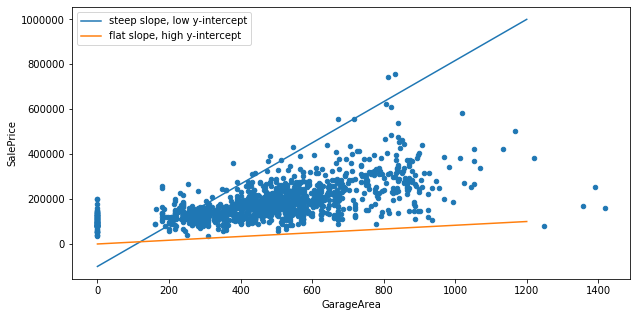

In [17]:
fig2, ax2 = plt.subplots(figsize=(10,5))
housing.plot(x='GarageArea', y='SalePrice', kind='scatter', ax=ax2)
ax2.plot([0, 1200], [-100_000, 1_000_000], label='steep slope, low y-intercept')
ax2.plot([0, 1200], [0, 100_000], label='flat slope, high y-intercept')
ax2.legend()
#fig2

In [15]:
w0_range = range(-100_000, 125_000, 25_000)
w1_range = range(50, 300, 25)
df_errors_r2 = compute_r2('GarageArea', w0_range, w1_range)
df_errors_r2.sort_values('r2', ascending=False).head(3)

,w0,w1,r2
77,75000,225,0.388307
69,50000,275,0.374937
85,100000,175,0.364883


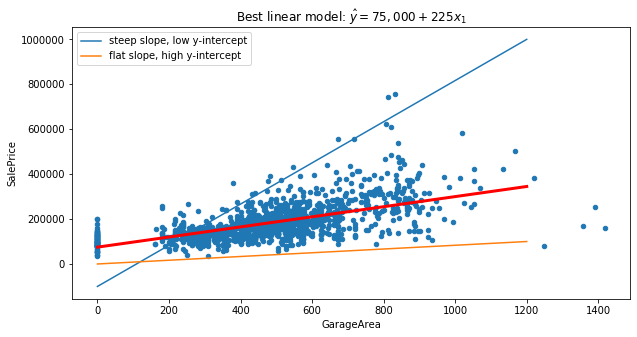

In [18]:
def simple_lr_model2(X):
    return 75000 + 225 * X

X = np.array([0, 1200])
y_pred = simple_lr_model2(X)
ax2.plot(X, y_pred, color='red', label='best model', lw=3)
ax2.set_title('Best linear model: $\hat{y} = 75,000 + 225 x_1$')
ax2.legend
fig2